#          <div class="alert alert-block alert-success">  <span style="color:red">Copyright © 2021 - Group - Synergy</span>

___

<p style="text-align: center; width: 333px;"><img src="https://lh3.googleusercontent.com/A_URlPrpAHJvZiFq70ZGjhBLRae80e-3-hboq-5hyKEXEMb-Llu5DHiq2B4GbcEYThdsRfOrTGz6LoJP7tff_e2Un7H2Gp23QKGZ686eNvT2eMb3lZ0LowD_mkfZsmXLyA=w1280" class="img-fluid" alt="SYNERGY"></p>

___

# <span style="color:purple">AutoScout Data Analysis Project</span>

<div class="alert alert-block alert-warning">
## <span style=" color:green"> Introduction</span>
**Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, we applied several commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy. We are going to analyse clean dataset to achieve meaningful outcome.

## <span style="color:green"> Aim </span>
We are going to achieve a dataset which contains meaningful features to distinguish car values. This dataset is going to be suitable for machine learning <strong>(ML)</strong> algorithms.

## <span style="color:green">Project Structure </span><br>
<dl>
<dt>PARTS</dt></dl>

<ol>
 <li>First part is related with <strong>'data cleaning'</strong>. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.</li><br>
 <li>Second part is related with <strong>'filling data'</strong>. It deals with Missing Values. Categorical to numeric transformation is done.</li><br>
 <li>Third part is related with <strong>'handling outliers of data'</strong> via Visualisation libraries. Some insights are extracted.</li>
</ol><br>

## <span style="color:green">Frequently used Information </span><br>

df_car: A copy of the original data


'` `' column names : ~~Which does not contain meaningful information for any further info so those are going to be dropped~~



 ## <span style="color:green">A user of Automobile buyer generally see below search conditions </span><br>
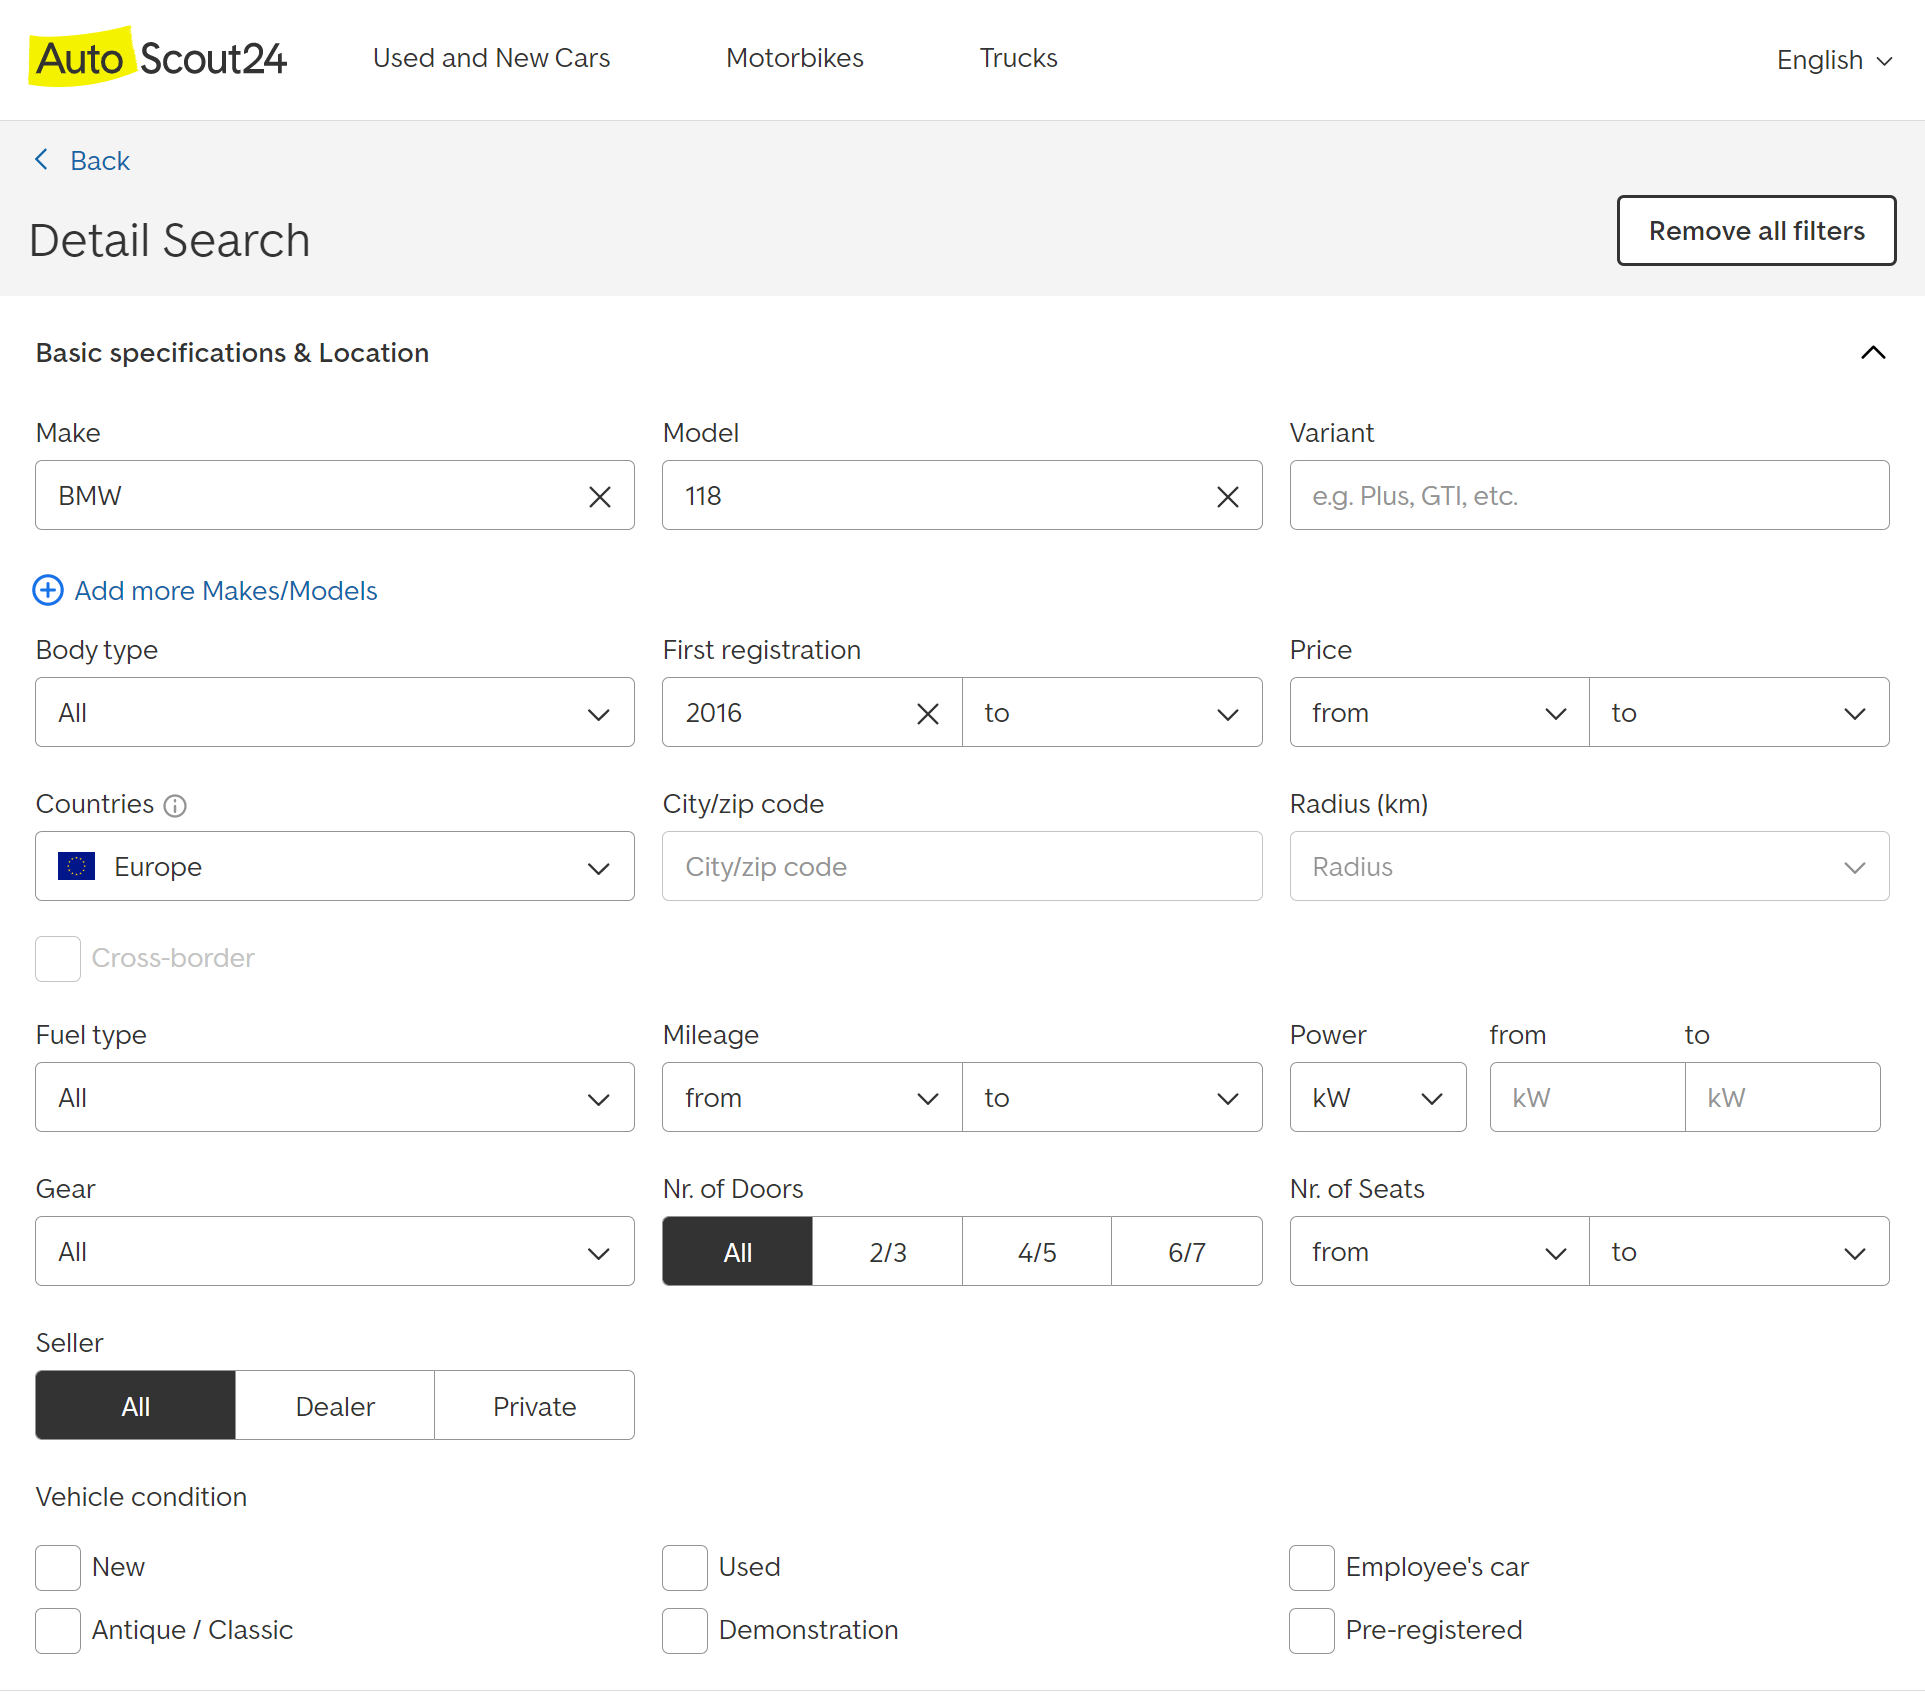
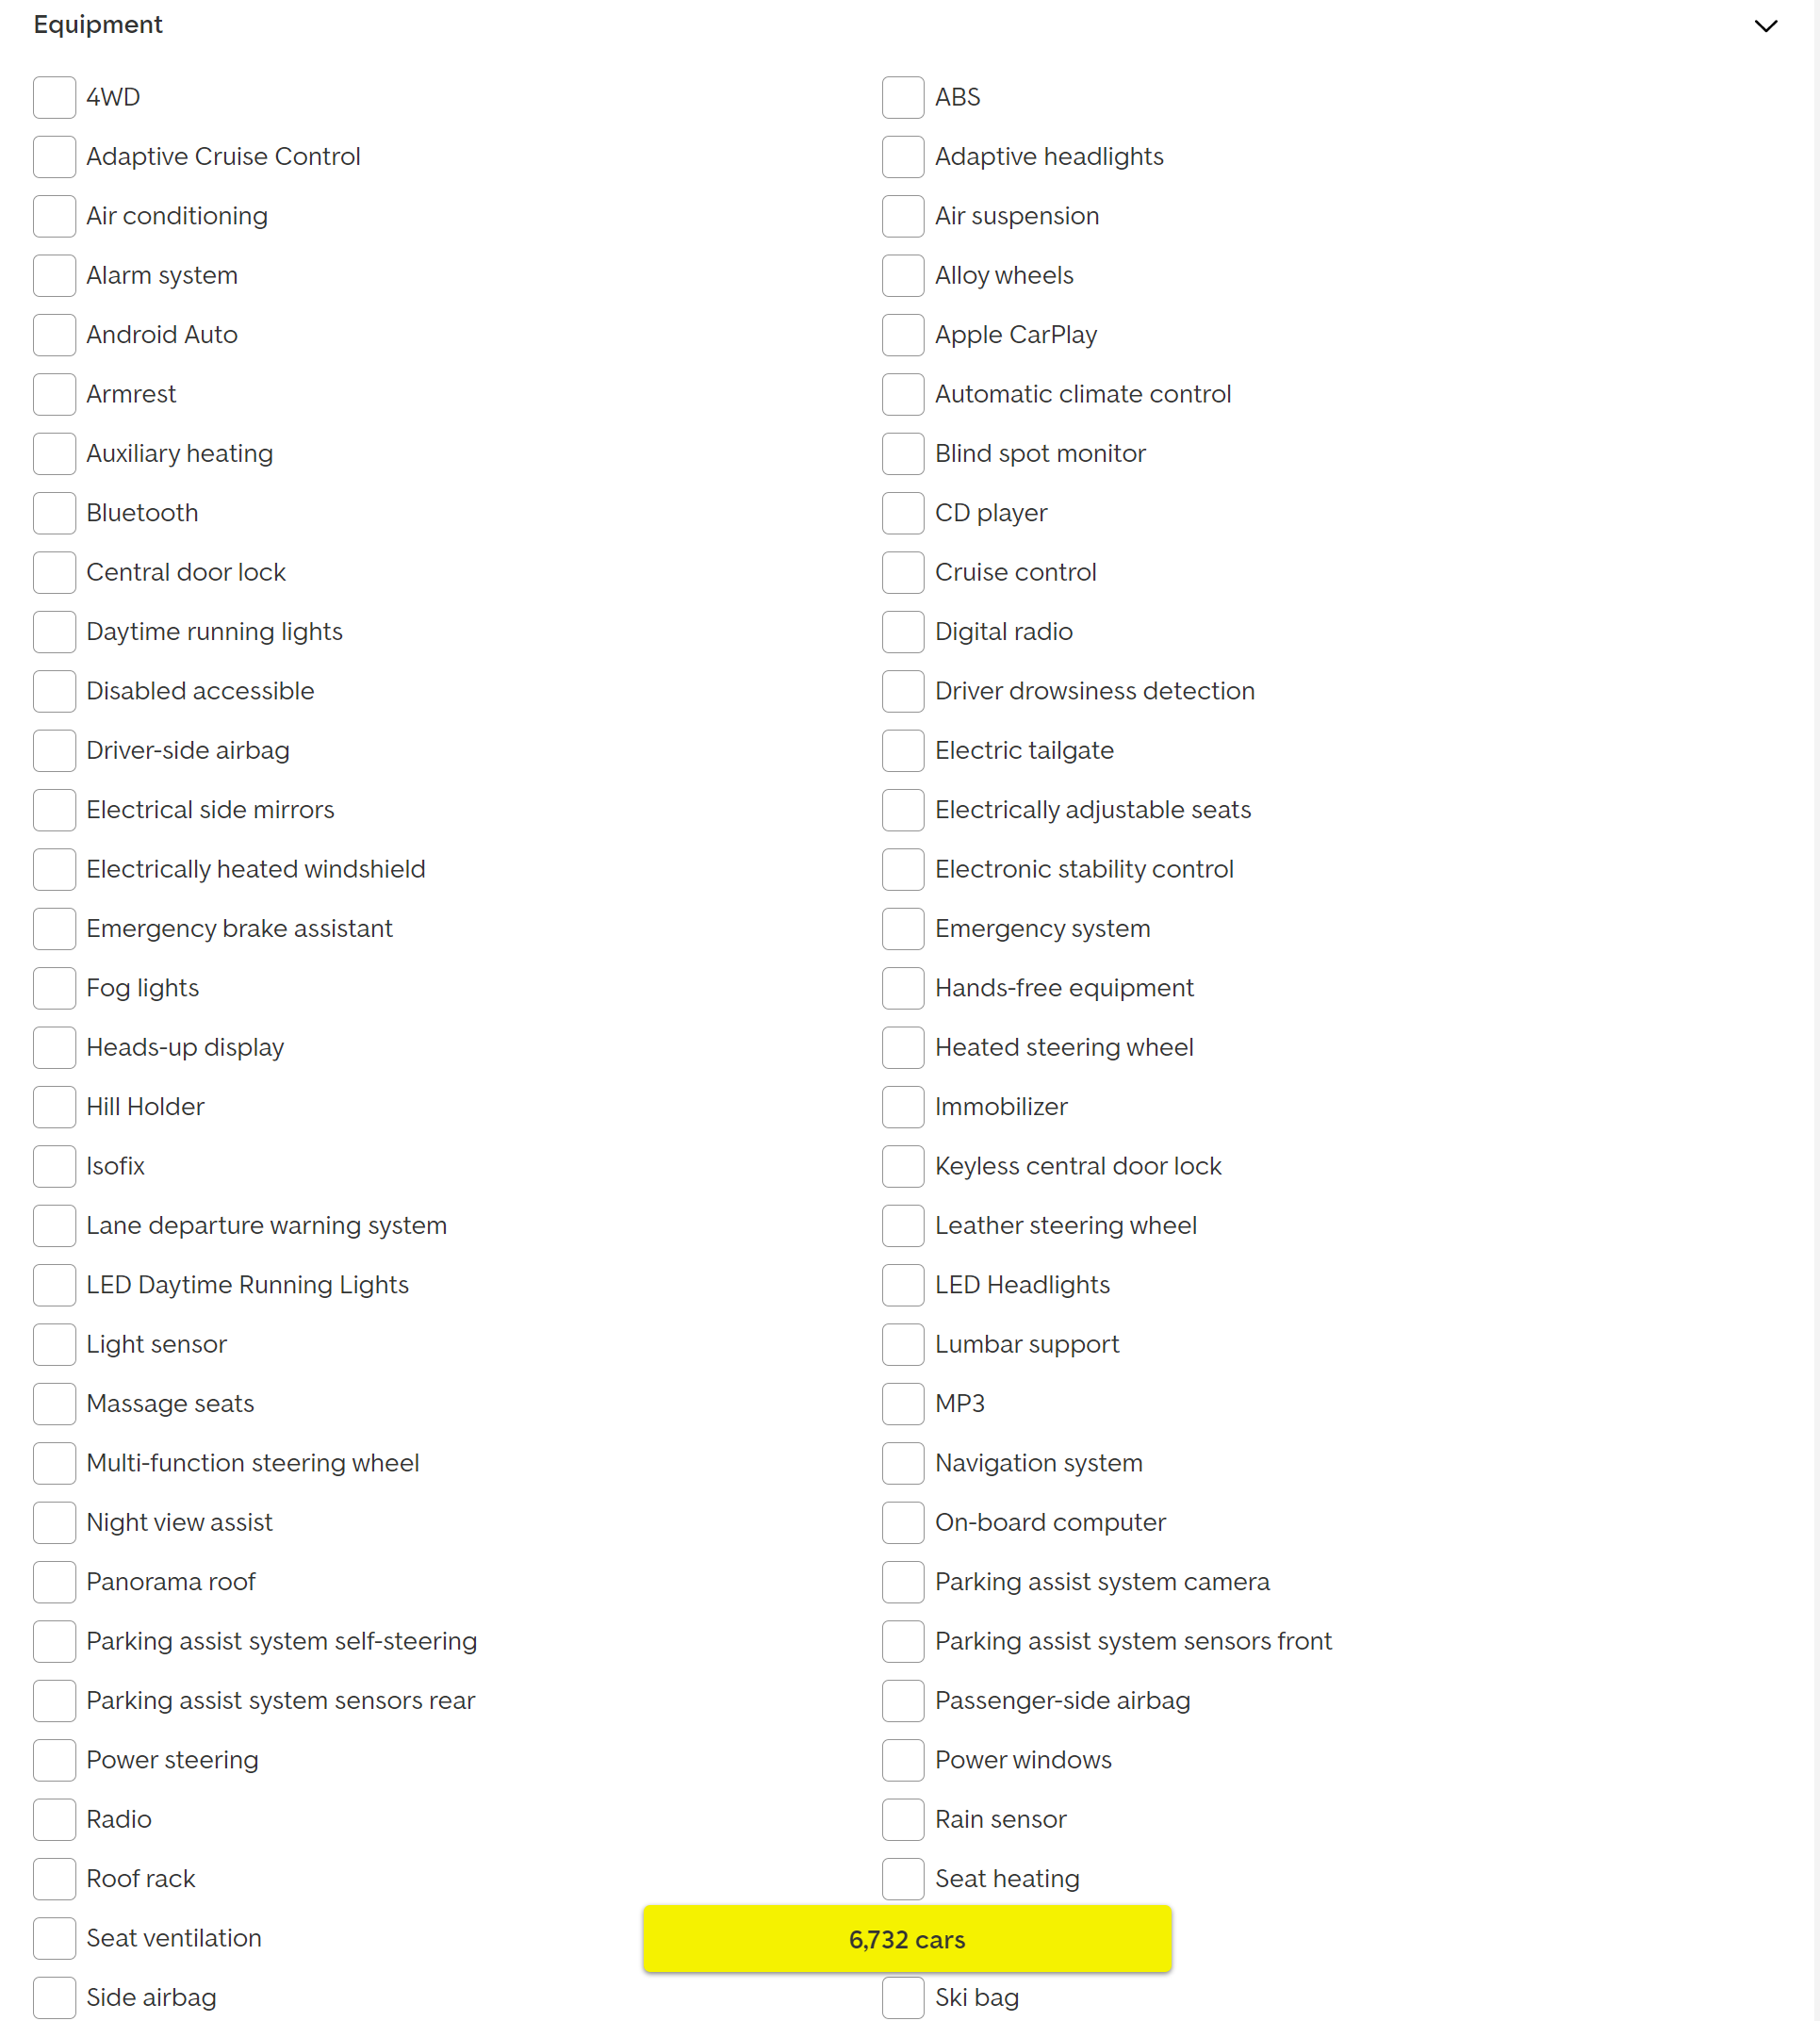
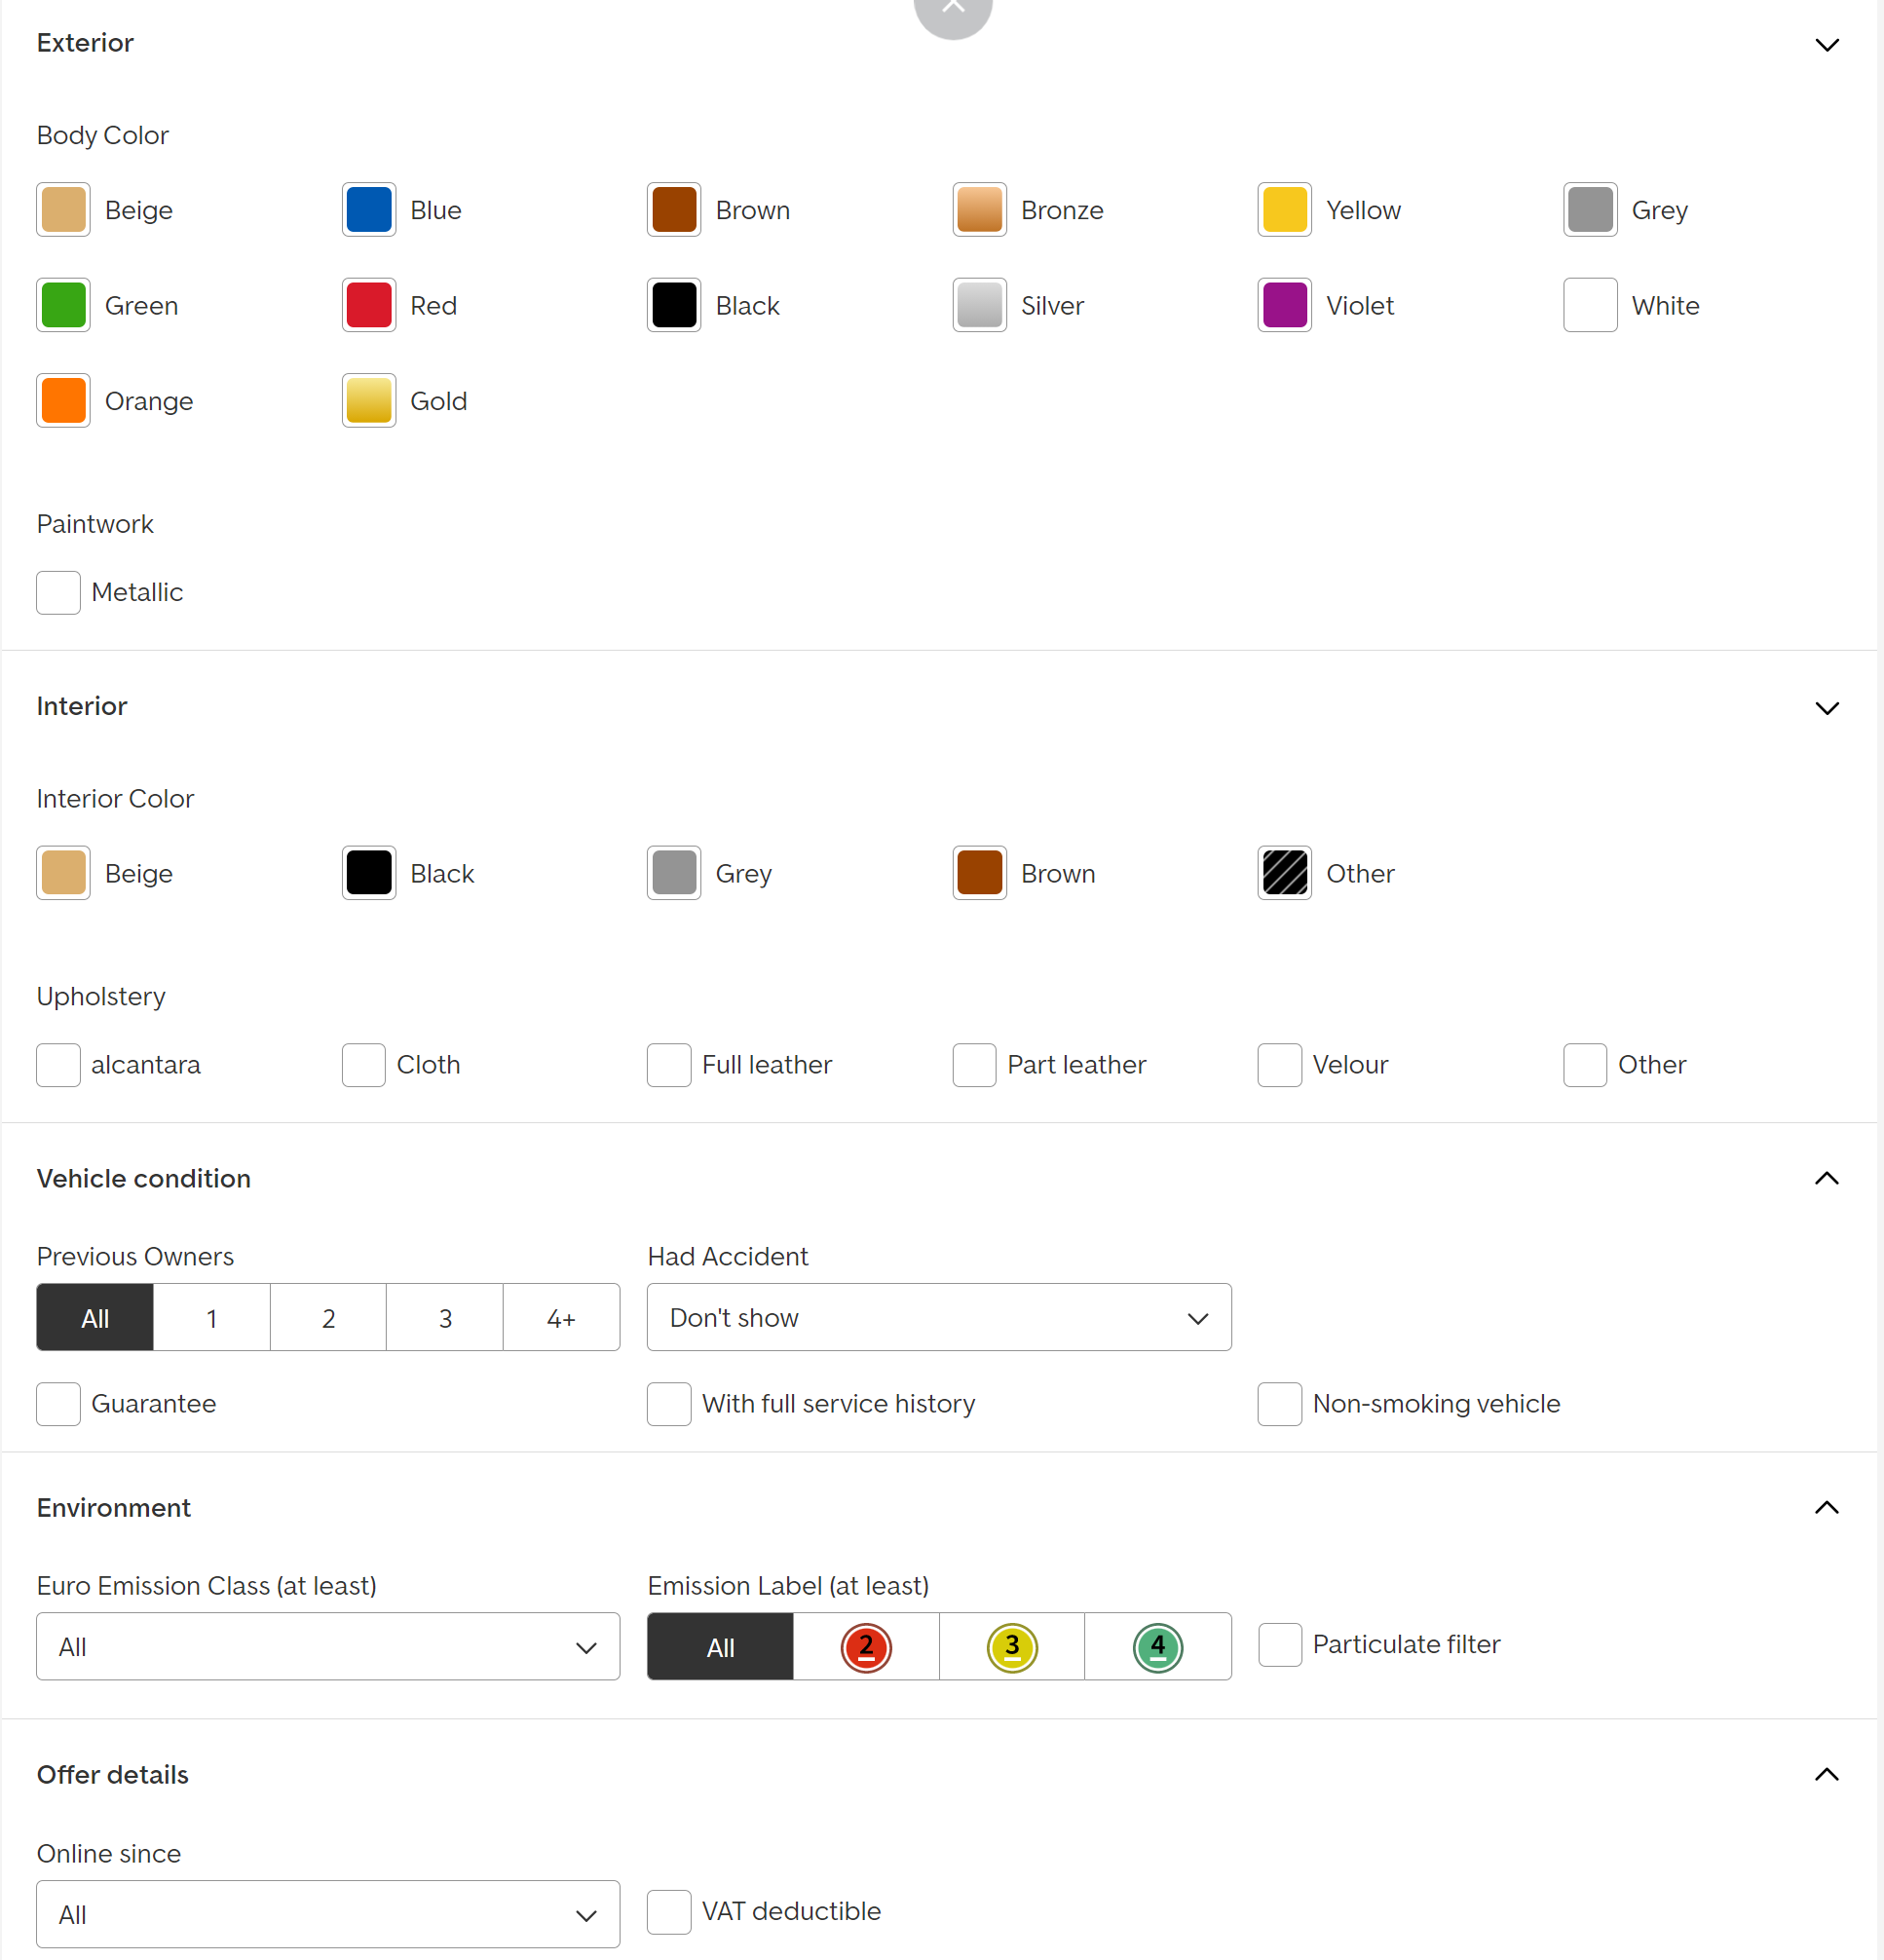

# <span style="color:purple"> PART- 1 </span> `( Data Cleaning )`

In [19]:
### PART -1 ###

# Import Required Libraries
import json
import pandas as pd
import numpy as np

# Suitable display settings to work on the dataset. Values can adjustable when they required.

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
# pd.set_option('display.max_rows', 50)
# pd.set_option('display.min_rows', 50)
# pd.set_option('display.width', 5000)
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# This query brings us the .json file's content in its structure.
data = []
for line in open('scout_car.json', 'r'):
    data.append(json.loads(line))

In [3]:
# To show data content
data

[{'url': 'https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e',
  'make_model': 'Audi A1',
  'short_description': 'Sportback 1.4 TDI S-tronic Xenon Navi Klima',
  'body_type': 'Sedans',
  'price': 15770,
  'vat': 'VAT deductible',
  'km': '56,013 km',
  'registration': '01/2016',
  'prev_owner': '2 previous owners',
  'kW': None,
  'hp': '66 kW',
  'Type': ['', 'Used', '', 'Diesel (Particulate Filter)'],
  'Previous Owners': '\n2\n',
  'Next Inspection': ['\n06/2021\n', '\n99 g CO2/km (comb)\n'],
  'Inspection new': ['\nYes\n', '\nEuro 6\n'],
  'Warranty': ['\n', '\n', '\n4 (Green)\n'],
  'Full Service': ['\n', '\n'],
  'Non-smoking Vehicle': ['\n', '\n'],
  'null': [],
  'Make': '\nAudi\n',
  'Model': ['\n', 'A1', '\n'],
  'Offer Number': ['\nLR-062483\n'],
  'First Registration': ['\n', '2016', '\n'],
  'Body Color': ['\n', 'Black', '\n'],
  'Paint Type': ['\nMetallic\n'],
  'Body Color Original': [

In [4]:
# Convert into a dataframe (df)
df = pd.read_json('scout_car.json',lines=True)
#visualise the df
df


url      make_model  \
0      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
1      https://www.autoscout24.com//offers/audi-a1-1-...         Audi A1   
2      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
3      https://www.autoscout24.com//offers/audi-a1-1-...         Audi A1   
4      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
...                                                  ...             ...   
15914  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15915  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15916  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15917  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15918  https://www.autoscout24.com//offers/renault-es...  Renault Espace   

                                       short_description body_type  price  \
0            Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                         1.8 TFSI sport    Sedans  14500   
2      Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                                1.4 TDi Design S tronic    Sedans  14500   
4      Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   
...                                                  ...       ...    ...   
15914              Blue dCi 200CV EDC Executive 4Control       Van  39950   
15915                TCe 225 EDC GPF LIM Deluxe Pano,RFK       Van  39885   
15916  Blue dCi 200 EDC Initiale Paris Leder LED Navi...       Van  39875   
15917  Blue dCi 200CV EDC Business , NUOVA DA IMMATRI...       Van  39700   
15918        INITIALE PARIS TCe 225 EDC GPF NAVI SHZ AUX       Van  40999   

                    vat         km registration         prev_owner  kW  ...  \
0        VAT deductible  56,013 km      01/2016  2 previous owners NaN  ...   
1      Price negotiable  80,000 km      03/2017               None NaN  ...   
2        VAT deductible  83,450 km      02/2016   1 previous owner NaN  ...   
3                  None  73,000 km      08/2016   1 previous owner NaN  ...   
4                  None  16,200 km      05/2016   1 previous owner NaN  ...   
...                 ...        ...          ...                ...  ..  ...   
15914    VAT deductible       - km          -/-               None NaN  ...   
15915    VAT deductible   9,900 km      01/2019   1 previous owner NaN  ...   
15916    VAT deductible      15 km      03/2019   1 previous owner NaN  ...   
15917    VAT deductible      10 km      06/2019               None NaN  ...   
15918    VAT deductible       - km      01/2019   1 previous owner NaN  ...   

                                             description   Emission Label  \
0      [\n, Sicherheit:,  , Deaktivierung für Beifahr...              NaN   
1      [\nLangstreckenfahrzeug daher die hohe Kilomet...  [\n4 (Green)\n]   
2      [\n, Fahrzeug-Nummer: AM-95365,  , Ehem. UPE 2...  [\n4 (Green)\n]   
3      [\nAudi A1: , - 1e eigenaar , - Perfecte staat...              NaN   
4      [\n, Technik & Sicherheit:, Xenon plus, Klimaa...              NaN   
...                                                  ...              ...   
15914  [\nVettura visionabile nella sede in Via Roma ...              NaN   
15915  [\nDach: Panorama-Glas-Schiebedach, Lackierung...              NaN   
15916  [\n, Getriebe:,  Automatik, Technik:,  Bordcom...              NaN   
15917  [\nDEK:[2691331], Renault Espace Blue dCi 200C...              NaN   
15918  [\n, Sicherheit Airbags:,  , Seitenairbag,  , ...  [\n4 (Green)\n]   

         Gears Country version Electricity consumption Last Service Date  \
0          NaN             NaN                     NaN               NaN   
1      [\n7\n]             NaN                     NaN               NaN   
2          NaN             NaN                     NaN               NaN   
3      [\n6\n]             NaN       

In [12]:
# check a column if it contains list of values. returns 2 list that we need to define
def check_is_list(df):
    list_of_columns = []
    non_list_of_columns = []
    for i in df.columns:
        counter_list=0
        counter_non_list=0
        for j in df[i].values:
            if isinstance(j, list):
                counter_list+=1
            else:
                counter_non_list+=1
        if counter_list > 0:
            list_of_columns.append(i)
        else :
            non_list_of_columns.append(i)
    return list_of_columns,non_list_of_columns

def list_to_columns(df,col): 
    dftemp = pd.DataFrame([pd.Series(x) for x in df[col]])
    column_names= []
    max_element = len(max(df.loc[df[col].apply(lambda x : isinstance(x, list))][col], key=len))
    for i in range(max_element):
        column_names.append(col + str(i+1))
    dftemp.columns = column_names
    df = df.drop(col,axis=1)
    if max_element == 1:
        dftemp.rename(columns={col+'1': col},inplace = True)
    df_added = pd.concat([df, dftemp], axis=1, sort=False)
    return df_added


In [13]:
#replace all "", [], \n, values to np.Nan or delete if possible in df
for i in df.columns:
    df[i] = df[i].replace("",np.NaN)
    df[i] = df[i].apply(lambda x: np.nan if (type(x) == list and len(x) == 0) else x) # convert [] to np.NAN
    try:
        df[i] = df[i].apply(lambda x: list(map(lambda x: x.strip(), x)) if type(x)==list else x)
    except:
        continue
    df[i] = df[i].apply(lambda x : np.NaN if x=='\n' else x)
    df[i] = df[i].apply(lambda x: (("".join(x.replace("\n",""))) if (type(x)==str and type(x) != float) else x) if x!=np.nan else x)

#repeat same steps 2nd time for check if there list in list at df if yes apply methods.
list_columns, nonlist_columns = check_is_list(df)
for i in list_columns:
    df = list_to_columns(df,i)

#replace all "", [], \n, values to np.Nan or delete if possible in df
for i in df.columns:
    df[i] = df[i].replace("",np.NaN)
    df[i] = df[i].apply(lambda x: np.nan if (type(x) == list and len(x) == 0) else x) # convert [] to np.NAN
    try:
        df[i] = df[i].apply(lambda x: list(map(lambda x: x.strip(), x)) if type(x)==list else x)
    except:
        continue
    df[i] = df[i].apply(lambda x : np.NaN if x=='\n' else x)
    df[i] = df[i].apply(lambda x: (("".join(x.replace("\n",""))) if (type(x)==str and type(x) != float) else x) if x!=np.nan else x)

In [23]:
df.head(1)

url  \
0  https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-b...   

  make_model                            short_description body_type  price  \
0    Audi A1  Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   

              vat         km registration         prev_owner  kW     hp  null  \
0  VAT deductible  56,013 km      01/2016  2 previous owners NaN  66 kW   NaN   

   Make Availability Available from  Type1 Type2  Type3  \
0  Audi          NaN            NaN    NaN  Used    NaN   

                         Type4 Previous Owners1 Previous Owners2  \
0  Diesel (Particulate Filter)                2              NaN   

  Previous Owners3  Previous Owners4 Previous Owners5  Previous Owners6  \
0              NaN               NaN              NaN               NaN   

  Previous Owners7  Previous Owners8 Next Inspection1    Next Inspection2  \
0              NaN               NaN          06/2021  99 g CO2/km (comb)   

  Next Inspection3  Next Inspection4 Next Inspection5  Next Inspection6  \
0              NaN               NaN              NaN               NaN   

  Next Inspection7  Next Inspection8 Inspection new1 Inspection new2  \
0              NaN               NaN             Yes          Euro 6   

  Inspection new3  Inspection new4 Inspection new5  Inspection new6  \
0             NaN              NaN             NaN              NaN   

  Inspection new7  Inspection new8 Warranty1 Warranty2  Warranty3 Warranty4  \
0             NaN              NaN       NaN       NaN  4 (Green)       NaN   

  Warranty5 Warranty6 Warranty7 Warranty8  Warranty9  Full Service1  \
0       NaN       NaN       NaN       NaN        NaN            NaN   

   Full Service2 Full Service3 Full Service4  Full Service5 Full Service6  \
0            NaN           NaN           NaN            NaN           NaN   

   Full Service7 Full Service8  Full Service9  Non-smoking Vehicle1  \
0            NaN           NaN            NaN                   NaN   

   Non-smoking Vehicle2 Non-smoking Vehicle3 Non-smoking Vehicle4  \
0                   NaN                  NaN                  NaN   

   Non-smoking Vehicle5 Non-smoking Vehicle6  Non-smoking Vehicle7  \
0                   NaN                  NaN                   NaN   

  Non-smoking Vehicle8  Non-smoking Vehicle9  Model1 Model2  Model3  \
0                  NaN                   NaN     NaN     A1     NaN   

  Offer Number  First Registration1 First Registration2  First Registration3  \
0    LR-062483                  NaN                2016                  NaN   

   Body Color1 Body Color2  Body Color3 Paint Type Body Color Original  \
0          NaN       Black          NaN   Metallic       Mythosschwarz   

     Upholstery  Body1   Body2  Body3 Nr. of Doors Nr. of Seats Model Code  \
0  Cloth, Black    NaN  Sedans    NaN            5            5   0588/BDF   

   Gearing Type1 Gearing Type2  Gearing Type3 Displacement Cylinders  \
0            NaN     Automatic            NaN     1,422 cc         3   

     Weight Drive chain  Fuel1                        Fuel2  Fuel3  \
0  1,220 kg       front    NaN  Diesel (Particulate Filter)    NaN   

            Consumption1           Consumption2              Consumption3  \
0  [3.8 l/100 km (comb)]  [4.3 l/100 km (city)]  [3.5 l/100 km (country)]   

  Consumption4  Consumption5 Consumption6  Consumption7       CO2 Emission1  \
0          NaN           NaN          NaN           NaN  99 g CO2/km (comb)   

   CO2 Emission2  CO2 Emission3 Emission Class1  Emission Class2  \
0            NaN            NaN          Euro 6              NaN   

   Emission Class3 \nComfort & Convenience\n1 \nComfort & Convenience\n2  \
0              NaN           Air conditioning                    Armrest   

  \nComfort & Convenience\n3 \nComfort & Convenience\n4  \
0  Automatic climate control             Cruise control   

  \nComfort & Convenience\n5 \nComfort & Convenience\n6  \
0    El

In [20]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW',
       ...
       'Last Service Date4', 'Last Service Date5', 'Last Service Date6',
       'Last Service Date7', 'Last Service Date8', 'Other Fuel Types1',
       'Other Fuel Types2', 'Other Fuel Types3',
       'Last Timing Belt Service Date1', 'Last Timing Belt Service Date2'],
      dtype='object', length=513)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Columns: 513 entries, url to Last Timing Belt Service Date2
dtypes: float64(51), int64(1), object(461)
memory usage: 62.3+ MB


In [6]:
# As a reference point we are going to study over a copy of the dataset.
# Thus, we can refer back to original dataset when it is necessary.
df_car = df

### <span style="color:purple"> PART -1  Continues </span><br>

<div class="alert alert-block alert-warning">
In this part we are going to analyse the columns to clean and make structured content.
</div>

# 0 url


In [7]:
# Unique identifier value so it is not useful for a ML study. It is going to be dropped.
df_car["url"].value_counts()

https://www.autoscout24.com//offers/opel-astra-1-4-cool-sound-garantie-gasoline-red-3504a7ab-294d-4db9-a333-8bc2422bc2c1                          1
https://www.autoscout24.com//offers/renault-clio-1-2-limited-75-ps-navi-klima-gasoline-white-c9a2d709-0e26-4a33-9660-9994ae681a13                 1
https://www.autoscout24.com//offers/opel-insignia-sports-tourer-1-5-turbo-aut-innovation-gasoline-silver-572a880e-4c1a-4465-b224-e995d52804c4     1
https://www.autoscout24.com//offers/opel-insignia-sports-tourer-gasoline-white-b697ef29-d2d3-4e6d-9676-61f26215aad9                               1
https://www.autoscout24.com//offers/audi-a1-spb-30-tfsi-s-tronic-admired-listino-32100-gasoline-white-c0a83f8a-a110-5563-e053-e250040a3092        1
                                                                                                                                                 ..
https://www.autoscout24.com//offers/renault-espace-intens-tce-225-edc-navi-shz-pdc-7-sitze-gasoline-grey-4cc83f4

# 1 make_model

It contains <mark>duplicate</mark> information from `19  Make` and `20  Model` columns.

<div class="alert alert-block alert-danger">
    This can be dropped.

In [11]:
# Splitted `Make` and `Model` information
df_car[['Make','Model']] = df_car["make_model"].str.split(" ",expand=True)

# 2 short_description

<div class="alert alert-block alert-warning">
    Contains multi information about the car. we are going to compare with `44 description` section to decide is it meaningful. 

# 3 body_type

In [12]:
# Discovered 60 null values. We are going to check them seperately if we can gain relevant information from other columns.
df_car["body_type"].value_counts()

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

# 4 Price

<div class="alert alert-block alert-success">
    Price value is useful directly. 

# 5 VAT
Three Categories<br>
`VAT Deductable`<br>
`negotiable`<br>
`none`<br>

<code style="background:yellow;color:black"> VAT in Germany is 19%.</code>

negotiable range is %2 to 15%. / bizi kasacak olursa, aralik deger degilde sabit degerde dusunebiliriz. 

#### [What is VAT?](https://ec.europa.eu/taxation_customs/what-vat_en)
<div class="alert alert-block alert-info">
The Value Added Tax, or VAT, in the European Union is a general, broadly based consumption tax assessed on the value added to goods and services. It applies more or less to all goods and services that are bought and sold for use or consumption in the European Union. Thus, goods which are sold for export or services which are sold to customers abroad are normally not subject to VAT.

In [16]:
df_car["vat"].value_counts()

VAT deductible      10980
Price negotiable      426
Name: vat, dtype: int64

In [17]:
df_car["vat"].isnull().sum()

4513

# 6  km

In [32]:
#Splitted km info into KM  and idle0 columns. idle0 column is going to be deleted.
df_car[['KM','']] = df_car["km"].str.split(" ",expand=True)

In [33]:
# Comma's deleted from KM column. Thus, this value ready to use.
df_car = df_car.replace({',':''}, regex=True)

In [34]:
#non-number value is exist in original data
df[df.km == "- km"].km.count()

1024

In [35]:
# '-' values converted '0' because it represents new cars.
df_car = df_car.replace({'-':'0'}, regex=True)

In [36]:
# KM column data type converted from string to integer.
df_car['KM'] = df_car['KM'].astype(str).astype(int)

<div class="alert alert-block alert-danger">?? float ta yapabiliriz.

In [37]:
# ?????????? bu ne icin
type(np.nan)

float

# 7 registration

>Produced <strong>`year`</strong> of the car is an essential feature for its price. Car depreciation is calculated according to the years in most of the authorities.

In [38]:
##df_car.registration = pd.to_datetime(df_car.registration) convert into datetime format

In [39]:
# Splitted information according to years.
new = df_car["registration"].str.rsplit("/", n = 1, expand = True)
df_car["Registration"]=new[1]

# For brand new cars '0' is converted to 2019 to match with date format.
df_car["Registration"]=df_car['Registration'].apply(lambda x: "2019" if x=="0" else x) # 0 lari 2019 olarak degistirdik
df_car["Registration"] = pd.to_datetime(df_car["Registration"])

In [40]:
df_car['Registration'].value_counts()

2018-01-01    4522
2019-01-01    4450
2016-01-01    3674
2017-01-01    3273
Name: Registration, dtype: int64

# 8  prev_owner

Column `12  Previous Owners` contains duplicate information

In [46]:
# Export the number of the previous owners.
new1 = df_car["prev_owner"].str.split(" ", n = 1, expand = True)
df_car["Prev_Owner"]=new1[0] # None values are not processed.

# 9 kW

In [47]:
#drop columns. It is empty.

<div class="alert alert-block alert-info">
Until now 2 columns 'url' are 'kW' useless columns. <font color=pink>eg. df_car = df_car.drop(['url','kW'], axis=1)</font>

# 10 hp

In [ ]:
#Horsepower is splitted from words and converted into integer values.

new2 = df_car["hp"].str.split(" ", n = 1, expand = True)
df_car["hp"]=new2[0]
df_car["hp"] = df_car["hp"].astype(int)

# 11 Type

It contains 2 useful information. However, fuel type is also available in <strong>`36  Fuel`</strong>

1-<mark>Usage Type</mark>:  New/Demonstration/ Used /Employee's car <p>
2-<mark>Fuel Type</mark>
    
- 1)Diesel/ 2)Electric/ 3)Petrol(Gasoline, Benzine) / 4)LPG/CNG/biogas/domestic gas <p>
    #### <font color=red> <strong>`Particule filter`</strong> is a filter type</font><p>
    77 outputu belirledigimiz Fuel Typelarin icine dagitacagiz
 <div class="alert alert-block alert-info">
        NaN Cells <p>
 #2765, #5238 cell numbers

In [49]:
df_car["Type"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[, Used, , Diesel (Particulate Filter)]                                                                                                       3475
[, Used, , Diesel]                                                                                                                            2516
[, Used, , Gasoline]                                                                                                                          2367
[, Used, , Super 95]                                                                                                                          1818
[, Pre-registered, , Super 95]                                                                                                                 500
                                                                                                                                              ... 
[, Used, , Regular/Benzine 91 / Super 95 / Super Plus 98 / Super Plus E10 98 / Super E10 95 / Regular/Benzine E10 91 (

In [50]:
# To work with a list. Type is assign to a list.
typeRAW=df_car["Type"]

In [51]:
#df_car["Type"]=df_car["Type"].fillna("[]")

In [52]:
#List is converted to dataframe
df_typeRAW=pd.DataFrame(typeRAW)

In [53]:
df_typeRAW

Type
0                [, Used, , Diesel (Particulate Filter)]
1                                   [, Used, , Gasoline]
2                [, Used, , Diesel (Particulate Filter)]
3                [, Used, , Diesel (Particulate Filter)]
4                [, Used, , Diesel (Particulate Filter)]
...                                                  ...
15914             [, New, , Diesel (Particulate Filter)]
15915  [, Used, , Super 95 / Super Plus 98 (Particula...
15916                       [, Pre-registered, , Diesel]
15917                       [, Pre-registered, , Diesel]
15918                      [, Demonstration, , Super 95]

[15919 rows x 1 columns]

In [55]:
# There 2 missing values
df_typeRAW.isna().value_counts() #df_car["Type"].isna().value_counts()

Type 
False    15917
True         2
dtype: int64

In [56]:
df_typeRAW=df_typeRAW.fillna("[]")

In [57]:
df_typeRAW.isna().value_counts()

Type 
False    15919
dtype: int64

In [58]:

df_car[['','Usage','','Fuel_Type']] = pd.DataFrame(df_typeRAW.Type.values.tolist(), index= df_typeRAW.index)
df_car

url      make_model  \
0      https://www.autoscout24.com//offers/audi0a10sp...         Audi A1   
1      https://www.autoscout24.com//offers/audi0a1010...         Audi A1   
2      https://www.autoscout24.com//offers/audi0a10sp...         Audi A1   
3      https://www.autoscout24.com//offers/audi0a1010...         Audi A1   
4      https://www.autoscout24.com//offers/audi0a10sp...         Audi A1   
...                                                  ...             ...   
15914  https://www.autoscout24.com//offers/renault0es...  Renault Espace   
15915  https://www.autoscout24.com//offers/renault0es...  Renault Espace   
15916  https://www.autoscout24.com//offers/renault0es...  Renault Espace   
15917  https://www.autoscout24.com//offers/renault0es...  Renault Espace   
15918  https://www.autoscout24.com//offers/renault0es...  Renault Espace   

                                       short_description body_type  price  \
0            Sportback 1.4 TDI S0tronic Xenon Navi Klima    Sedans  15770   
1                                         1.8 TFSI sport    Sedans  14500   
2      Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                                1.4 TDi Design S tronic    Sedans  14500   
4      Sportback 1.4 TDI S0Tronic S0Line Ext. admired Xe    Sedans  16790   
...                                                  ...       ...    ...   
15914              Blue dCi 200CV EDC Executive 4Control       Van  39950   
15915                 TCe 225 EDC GPF LIM Deluxe PanoRFK       Van  39885   
15916  Blue dCi 200 EDC Initiale Paris Leder LED Navi...       Van  39875   
15917  Blue dCi 200CV EDC Business  NUOVA DA IMMATRICOLA       Van  39700   
15918        INITIALE PARIS TCe 225 EDC GPF NAVI SHZ AUX       Van  40999   

                    vat        km registration         prev_owner  kW  ...  \
0        VAT deductible  56013 km      01/2016  2 previous owners NaN  ...   
1      Price negotiable  80000 km      03/2017               None NaN  ...   
2        VAT deductible  83450 km      02/2016   1 previous owner NaN  ...   
3                  None  73000 km      08/2016   1 previous owner NaN  ...   
4                  None  16200 km      05/2016   1 previous owner NaN  ...   
...                 ...       ...          ...                ...  ..  ...   
15914    VAT deductible      0 km          0/0               None NaN  ...   
15915    VAT deductible   9900 km      01/2019   1 previous owner NaN  ...   
15916    VAT deductible     15 km      03/2019   1 previous owner NaN  ...   
15917    VAT deductible     10 km      06/2019               None NaN  ...   
15918    VAT deductible      0 km      01/2019   1 previous owner NaN  ...   

                        Availability Last Timing Belt Service Date  \
0                                NaN                           NaN   
1                                NaN                           NaN   
2                                NaN                           NaN   
3                                NaN                           NaN   
4                                NaN                           NaN   
...                              ...                           ...   
15914                            NaN                           NaN   
15915    \nin 5 days from ordering\n                           NaN   
15916  \nin 120 days from ordering\n                           NaN   
15917                            NaN                           NaN   
15918                            NaN                           NaN   

      Available from     KM idle0 Registration Prev_Owner              Usage  \
0                NaN  56013    km   2016-01-01          2               Used   
1                NaN  80000    km   2017-01-01       None               Used   
2                NaN  83450    km   2016-01-01          1               Used   
3                NaN  73000    km   2016-01-01          1               Used   
4                NaN  16200    km   2

In [59]:
df_car["Fuel_Type"].value_counts()

Diesel (Particulate Filter)                                                                                  4315
Super 95                                                                                                     3338
Gasoline                                                                                                     3175
Diesel                                                                                                       2982
Super 95 / Regular/Benzine 91                                                                                 424
                                                                                                             ... 
Super 95 / Regular/Benzine 91 / Super E10 95 / Super Plus E10 98 / Super Plus 98 / Regular/Benzine E10 91       1
Super E10 95 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98       1
Regular/Benzine 91 / Super 95 / Super E10 95                                            

In [ ]:
# To check a specific type of a fuel.
df_car[df_car["Fuel_Type"]=='CNG']

# 12 - Previous Owners

In [60]:
# NO. of previous owners extracted.
df_car[['','Previous_Owners','']] = df_car["Previous Owners"].str.split("\n",expand=True,)
df_car

url      make_model  \
0      https://www.autoscout24.com//offers/audi0a10sp...         Audi A1   
1      https://www.autoscout24.com//offers/audi0a1010...         Audi A1   
2      https://www.autoscout24.com//offers/audi0a10sp...         Audi A1   
3      https://www.autoscout24.com//offers/audi0a1010...         Audi A1   
4      https://www.autoscout24.com//offers/audi0a10sp...         Audi A1   
...                                                  ...             ...   
15914  https://www.autoscout24.com//offers/renault0es...  Renault Espace   
15915  https://www.autoscout24.com//offers/renault0es...  Renault Espace   
15916  https://www.autoscout24.com//offers/renault0es...  Renault Espace   
15917  https://www.autoscout24.com//offers/renault0es...  Renault Espace   
15918  https://www.autoscout24.com//offers/renault0es...  Renault Espace   

                                       short_description body_type  price  \
0            Sportback 1.4 TDI S0tronic Xenon Navi Klima    Sedans  15770   
1                                         1.8 TFSI sport    Sedans  14500   
2      Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                                1.4 TDi Design S tronic    Sedans  14500   
4      Sportback 1.4 TDI S0Tronic S0Line Ext. admired Xe    Sedans  16790   
...                                                  ...       ...    ...   
15914              Blue dCi 200CV EDC Executive 4Control       Van  39950   
15915                 TCe 225 EDC GPF LIM Deluxe PanoRFK       Van  39885   
15916  Blue dCi 200 EDC Initiale Paris Leder LED Navi...       Van  39875   
15917  Blue dCi 200CV EDC Business  NUOVA DA IMMATRICOLA       Van  39700   
15918        INITIALE PARIS TCe 225 EDC GPF NAVI SHZ AUX       Van  40999   

                    vat        km registration         prev_owner  kW  ...  \
0        VAT deductible  56013 km      01/2016  2 previous owners NaN  ...   
1      Price negotiable  80000 km      03/2017               None NaN  ...   
2        VAT deductible  83450 km      02/2016   1 previous owner NaN  ...   
3                  None  73000 km      08/2016   1 previous owner NaN  ...   
4                  None  16200 km      05/2016   1 previous owner NaN  ...   
...                 ...       ...          ...                ...  ..  ...   
15914    VAT deductible      0 km          0/0               None NaN  ...   
15915    VAT deductible   9900 km      01/2019   1 previous owner NaN  ...   
15916    VAT deductible     15 km      03/2019   1 previous owner NaN  ...   
15917    VAT deductible     10 km      06/2019               None NaN  ...   
15918    VAT deductible      0 km      01/2019   1 previous owner NaN  ...   

       Last Timing Belt Service Date Available from     KM idle0 Registration  \
0                                NaN            NaN  56013    km   2016-01-01   
1                                NaN            NaN  80000    km   2017-01-01   
2                                NaN            NaN  83450    km   2016-01-01   
3                                NaN            NaN  73000    km   2016-01-01   
4                                NaN            NaN  16200    km   2016-01-01   
...                              ...            ...    ...   ...          ...   
15914                            NaN            NaN      0    km   2019-01-01   
15915                            NaN            NaN   9900    km   2019-01-01   
15916                            NaN            NaN     15    km   2019-01-01   
15917                            NaN            NaN     10    km   2019-01-01   
15918                            NaN            NaN      0    km   2019-01-01   

      Prev_Owner                Usage  \
0              2                 Used   
1           None  NaN            Used   
2              1                 Used   
3              1                 Used   
4              1                 Used   
...          ...  ...             ...   
15914       None  

<div class="alert alert-block alert-danger"><p>

# <font color=red> <strong> !!</strong></font>
`13  Next Inspection`,  `14  Inspection new`, `15  Warranty`, `16  Full Service` and `17  Non-smoking Vehicle` columns contains mixed up information. These information needs to moved to correct column. 

# 13- Next Inspection

In [61]:
df_car["Next Inspection"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\n04/2022\n                                                                                        62
\n03/2021\n                                                                                        38
\n03/2022\n                                                                                        36
\n06/2021\n                                                                                        34
\n01/2022\n                                                                                        32
                                                                                                   ..
[\n03/2020\n, \n90 g CO2/km (comb)\n]                                                               1
[\n05/2022\n, \n, 6.7 l/100 km (comb), \n, 8.7 l/100 km (city), \n, 5.6 l/100 km (country), \n]     1
[\n04/2021\n, \n, 5.1 l/100 km (comb), \n, 6.7 l/100 km (city), \n, 4.2 l/100 km (country), \n]     1
[\n07/2020\n, \n145 g CO2/km (comb)\n]                                            

<p style="background:black">
<code style="background:black;color:white">*** Copyright(c) 2021 - Group 7 Synergy
</code>
</p>

There is another columns for `Emission Class`

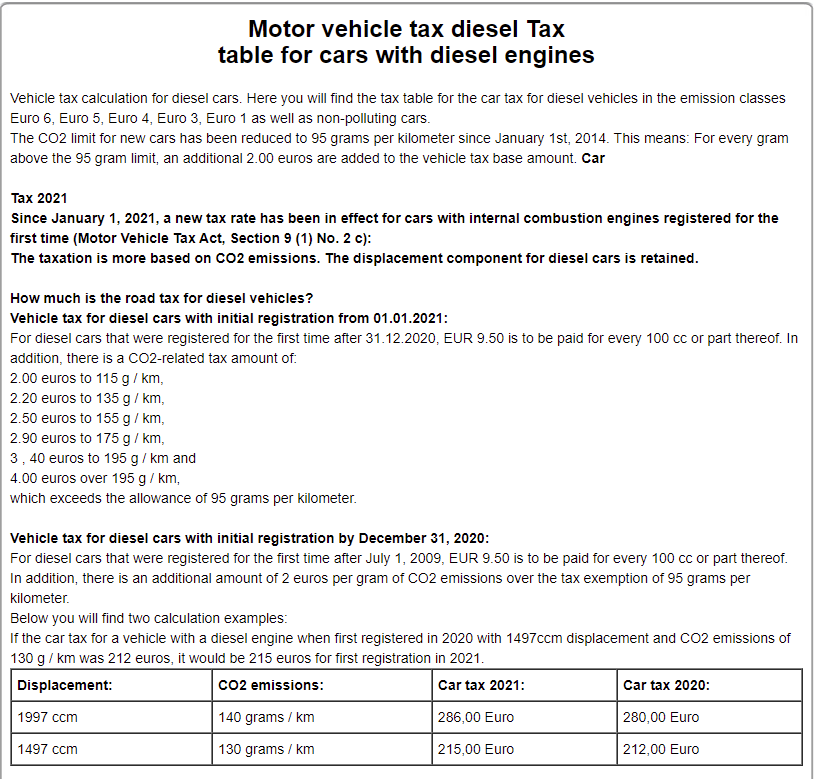

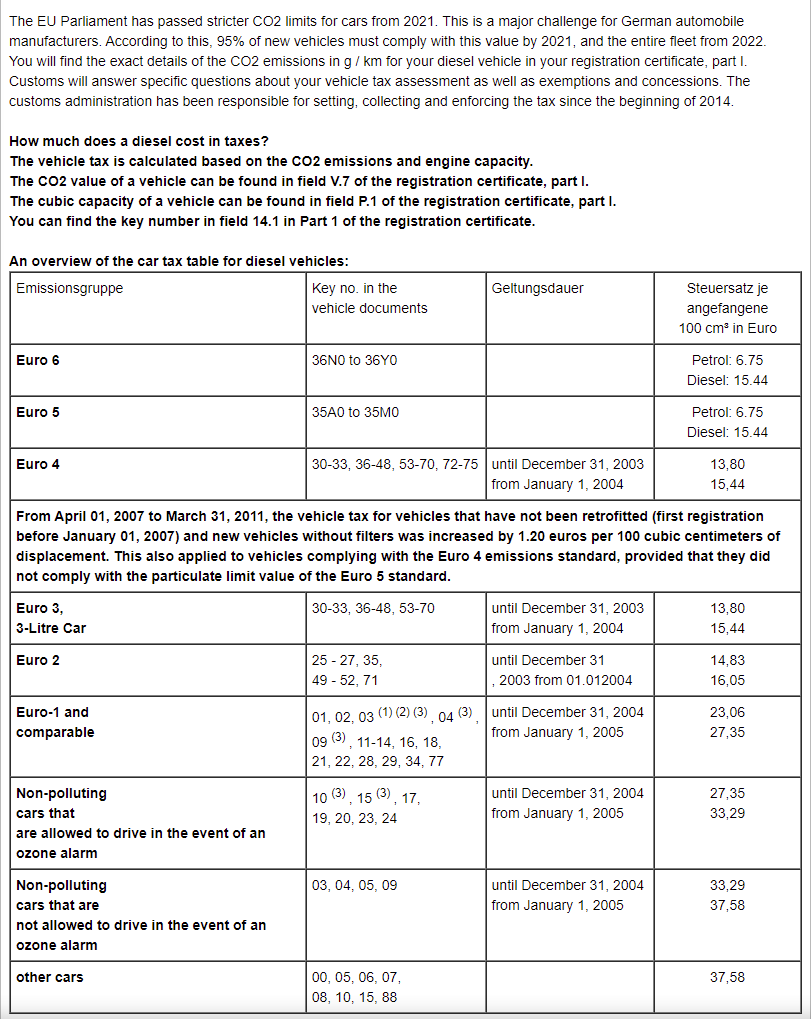

# 14 - Inspection new

<div class="alert alert-block alert-info">
    It contains Non-List values  =       \nYes\n       362

In [63]:
# It contains Non-List values  =       \nYes\n       362
df_car["Inspection new"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nYes\n, \nEuro 6\n]                                                                          523
\nYes\n                                                                                        362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                             174
[\nYes\n, \n4 (Green)\n]                                                                       166
[\nYes\n, \nEuro 6d-TEMP\n]                                                                    134
                                                                                              ... 
[\nYes\n, \n172 g CO2/km (comb)\n]                                                               1
[\nYes\n, \n, 5 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.2 l/100 km (country), \n]        1
[\nYes\n, \n, 6.2 l/100 km (comb), \n, 7.6 l/100 km (city), \n, 5.4 l/100 km (country), \n]      1
[\nYes\n, \n, 5.6 l/100 km (comb), \n, 7.1 l/100 km (city), \n, 4.7 l/100 km (country), \n]      1
[\nYes\n, 

# 15- Warranty

<div class="alert alert-block alert-info">
Some contains emission information!

In [66]:
df_car["Warranty"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, \n, \nEuro 6\n]                                                                                 1868
\n12 months\n                                                                                        1177
\n                                                                                                    979
\n24 months\n                                                                                         566
[\n, \n, \n4 (Green)\n]                                                                               517
                                                                                                     ... 
[\n3 months\n, \n146 g CO2/km (comb)\n]                                                                 1
[\n20 months\n, \n4 (Green)\n]                                                                          1
\n30 months\n                                                                                           1
[\n60 months\n, \n, 6.1 l/100 km (comb), \n, 7

# 16 Full Service

In [ ]:
df_car["Full Service"].value_counts()

#  17  Non-smoking Vehicle 

In [ ]:
df_car["Non-smoking Vehicle"].value_counts()

# 18  null    

<div class="alert alert-block alert-info">
    Until now 3 columns `url`,`kW` and `null` useless columns. <font color=pink>eg. df_car = df_car.drop(['url','kW','null'], axis=1)</font>

#  19  Make   

In [67]:
df_car["Make"].value_counts()

Opel       7343
Audi       5712
Renault    2864
Name: Make, dtype: int64

 # 20  Model   

In [68]:
df_car["Model"].value_counts()

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: Model, dtype: int64

#  21  Offer Number 

In [69]:
df_car["Offer Number"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nTP62881\n]      27
[\nJV03654\n]      27
[\nXT61649\n]      27
[\nAK13780\n]      27
[\nXJ38068\n]      27
                   ..
[\n9277941\n]       1
[\n19155-1\n]       1
[\n3124254\n]       1
[\nJ1109546\n]      1
[\n040394-MO\n]     1
Name: Offer Number, Length: 11440, dtype: int64

 # 22  First Registration 

In [74]:
df_car["First Registration"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
Name: First Registration, dtype: int64

#  23  Body Color  

In [75]:
df_car["Body Color"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: Body Color, dtype: int64

In [110]:
df_car["Body Color"].isna().value_counts()

False    15322
True       597
Name: Body Color, dtype: int64

#  24  Paint Type   

<div class="alert alert-block alert-warning">

if we cannot export paint info from other description columns. We may need to assign null=basic

In [76]:
df_car["Paint Type"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nMetallic\n]       9794
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: Paint Type, dtype: int64

In [111]:
df_car["Paint Type"].isna().value_counts()

False    10147
True      5772
Name: Paint Type, dtype: int64

# 25  Body Color Original 

<div class="alert alert-block alert-warning">

Almost 2K body color options. It is not suitable for filtering. May be if the common ones has major amount. We may call rest of them others. If none applicable, we can ommit the the Body color original, we already have colour section.

In [77]:
df_car["Body Color Original"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nOnyx Schwarz\n]              338
[\nBianco\n]                    282
[\nMythosschwarz Metallic\n]    238
[\nBrillantschwarz\n]           216
[\nGris\n]                      204
                               ... 
[\nBleu Celeste\n]                1
[\nBlu cosmo metallizzato\n]      1
[\nBlac Ivoire D16\n]             1
[\nkarbonschwarz met\n]           1
[\nSATIN STEEL\n]                 1
Name: Body Color Original, Length: 1927, dtype: int64

In [112]:
df_car["Body Color Original"].isna().value_counts()

False    12160
True      3759
Name: Body Color Original, dtype: int64

#  26  Upholstery    

<div class="alert alert-block alert-warning">

Full leather looks like an filter option.<p>
Major colours needs to seperate for minority colours needs to be called as "others"

In [78]:
df_car["Upholstery"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nCloth, Black\n]           5821
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Grey\n]      116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nVelour, Black\n]            36
[\nFull leather, Beige\n]      36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nBrown\n]                    12
[\nCloth, Blue\n]              12
[\nCloth, White\n]              8
[\nVelour, Gre

In [113]:
df_car["Upholstery"].isna().value_counts()

False    12199
True      3720
Name: Upholstery, dtype: int64

#  27  Body   

<div class="alert alert-block alert-warning">

Probably we can manage the find 60 missing body information because same models are exist in data with body info.<p>
 

In [79]:
df_car["Body"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: Body, dtype: int64

In [114]:
df_car["Body"].isna().value_counts()

False    15859
True        60
Name: Body, dtype: int64

# 28  Nr. of Doors  

<div class="alert alert-block alert-warning">

If a model has just one No. of Doors we can estimate the missing ones.<p>
    Otherwise we may assume them have common door numbers.<p>
    Any other idea?<p>

In [80]:
df_car["Nr. of Doors"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
[\n7\n]        1
[\n1\n]        1
Name: Nr. of Doors, dtype: int64

In [115]:
df_car["Nr. of Doors"].isna().value_counts()

False    15707
True       212
Name: Nr. of Doors, dtype: int64

#  29  Nr. of Seats

In [81]:
df_car["Nr. of Seats"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    13336
[\n4\n]     1125
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: Nr. of Seats, dtype: int64

In [116]:
df_car["Nr. of Seats"].isna().value_counts()

False    14942
True       977
Name: Nr. of Seats, dtype: int64

#  30  Model Code 

<div class="alert alert-block alert-warning">

Looks like useless.<p>

In [82]:
df_car["Model Code"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n0035/BCB\n]    268
[\n0588/BNO\n]    245
[\n0588/BDB\n]    206
[\n0588/BHX\n]    188
[\n1844/ADJ\n]    175
                 ... 
[\n0035/AVZ\n]      1
[\n1844/AEG\n]      1
[\n0035/BAV\n]      1
[\n3333/BBL\n]      1
[\n0035/BAS\n]      1
Name: Model Code, Length: 232, dtype: int64

In [117]:
df_car["Model Code"].isna().value_counts()

True     10941
False     4978
Name: Model Code, dtype: int64

#  31  Gearing Type      

<div class="alert alert-block alert-success">
    It is useful as it is.

In [83]:
df_car["Gearing Type"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: Gearing Type, dtype: int64

In [118]:
df_car["Gearing Type"].isna().value_counts()

False    15919
Name: Gearing Type, dtype: int64

# 32  Displacement    

<div class="alert alert-block alert-warning">

We need to define ranges for<p> 1.0,<p> 1.2,<p> 1.4, <p>1.6,<p> 1.8, <p>2.0 .<p>

In [84]:
df_car["Displacement"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n1,598 cc\n]    4761
[\n999 cc\n]      2438
[\n1,398 cc\n]    1314
[\n1,399 cc\n]     749
[\n1,229 cc\n]     677
                  ... 
[\n1,100 cc\n]       1
[\n1,800 cc\n]       1
[\n1,686 cc\n]       1
[\n1,369 cc\n]       1
[\n1,584 cc\n]       1
Name: Displacement, Length: 77, dtype: int64

In [119]:
df_car["Displacement"].isna().value_counts()

False    15423
True       496
Name: Displacement, dtype: int64

# 33  Cylinders    

In [85]:
df_car["Cylinders"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n4\n]    8105
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n2\n]       2
[\n8\n]       2
[\n1\n]       1
Name: Cylinders, dtype: int64

# 34  Weight     

In [86]:
df_car["Weight"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n1,163 kg\n]    574
[\n1,360 kg\n]    356
[\n1,165 kg\n]    301
[\n1,335 kg\n]    242
[\n1,135 kg\n]    213
                 ... 
[\n1,905 kg\n]      1
[\n1,281 kg\n]      1
[\n1,277 kg\n]      1
[\n1,057 kg\n]      1
[\n1,471 kg\n]      1
Name: Weight, Length: 434, dtype: int64

 # 35  Drive chain  

In [87]:
df_car["Drive chain"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nfront\n]    8886
[\n4WD\n]       171
[\nrear\n]        4
Name: Drive chain, dtype: int64

#  36  Fuel   

In [88]:
df_car["Fuel"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Diesel (Particulate Filter), \n]                                                                                  4315
[\n, Super 95, \n]                                                                                                     3338
[\n, Gasoline, \n]                                                                                                     3175
[\n, Diesel, \n]                                                                                                       2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                 424
                                                                                                                       ... 
[\n, Super 95 / Regular/Benzine 91 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95, \n]       1
[\n, Regular/Benzine 91 / Super Plus 98 / Regular/Benzine E10 91 / Super 95 / Super E10 95 / Super Plus E10 98, \n]       1
[\n, Reg

# 37  Consumption   

In [89]:
df_car["Consumption"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]              304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]              257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]              253
[[4.7 l/100 km (comb)], [5.1 l/100 km (city)], [4.4 l/100 km (country)]]              244
                                                                                     ... 
[[5.2 l/100 km (comb)], [6 l/100 km (city)], [4.8 l/100 km (country)]]                  1
[[5.3 l/100 km (comb)], [6 l/100 km (city)], [5 l/100 km (country)]]                    1
[\n, 6.5 l/100 km (comb), \n, 8.1 l/100 km (city), \n, 5.5 l/100 km (country), \n]      1
[[4.3 l/100 km (comb)], [5.6 l/100 km (city)], [3.5 l/100 km (country)]]                1
[[50 l/100 km (comb)], [64 l/100 km (city)], [42 l/100 km (country)]]                   1
Name: Cons

# 38  CO2 Emission       

In [90]:
df_car["CO2 Emission"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n120 g CO2/km (comb)\n]      740
[[], [], []]                   628
[\n99 g CO2/km (comb)\n]       545
[\n97 g CO2/km (comb)\n]       537
[\n104 g CO2/km (comb)\n]      501
                              ... 
[\n184 g CO2/km (comb)\n]        1
[\n171 g CO2/km (comb)\n]        1
[\n253 g CO2/km (comb)\n]        1
[\n1,060 g CO2/km (comb)\n]      1
[\n181 g CO2/km (comb)\n]        1
Name: CO2 Emission, Length: 123, dtype: int64

# 39  Emission Class    

In [91]:
df_car["Emission Class"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nEuro 6\n]          10139
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: Emission Class, dtype: int64

# 40  Comfort & Convenience

In [106]:
df_car["\nComfort & Convenience\n"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                                                                                                   216
[Air conditioning, Electrical side mirrors, Power windows]                                                                                                                                                                                                                                                                                                                                                                                                134
[Air conditioning, Power windows]                                                                           

# 41  Entertainment & Media

In [108]:
df_car["\nEntertainment & Media\n"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                    1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]     783
[On-board computer, Radio]                                                           487
[Radio]                                                                              477
                                                                                    ... 
[Bluetooth, CD player, Digital radio, MP3, Radio, Sound system, USB]                   1
[Bluetooth, Digital radio, On-board computer, Radio, Television, USB]                  1
[Bluetooth, CD player, Hands-free equipment, Sound system, USB]                        1
[CD player, Digital radio, Hands-free equipment, MP3, On-board computer, Radio]        1
[CD player, Hands-free equipment, On-board computer, Sound system]                     1
Name: \nEntertainment

#  42  Extras

In [109]:
df_car["\nExtras\n"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Alloy wheels]                                                                                                    3245
[Alloy wheels, Touch screen]                                                                                       697
[Alloy wheels, Voice Control]                                                                                      577
[Alloy wheels, Touch screen, Voice Control]                                                                        541
[Alloy wheels, Roof rack]                                                                                          385
                                                                                                                  ... 
[Alloy wheels, Cab or rented Car, Catalytic Converter, Roof rack, Sport seats]                                       1
[Alloy wheels, Handicapped enabled, Shift paddles, Sport package, Sport seats, Sport suspension, Touch screen]       1
[Alloy wheels, Right hand drive, Sport package, 

# 43  Safety & Security

In [107]:
df_car["\nSafety & Security\n"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                           538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                                       480
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]      

# 44  description       

In [96]:
df_car["description"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

# 45  Emission Label  

In [97]:
df_car["Emission Label"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n4 (Green)\n]         3553
[\n1 (No sticker)\n]     381
[[], [], []]              40
[\n5 (Blue)\n]             8
[\n3 (Yellow)\n]           2
[\n2 (Red)\n]              1
Name: Emission Label, dtype: int64

#  46  Gears      

In [98]:
df_car["Gears"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n6\n]     5822
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n4\n]        2
[\n3\n]        2
[\n1\n]        2
[\n50\n]       1
[\n2\n]        1
Name: Gears, dtype: int64

# 47  Country version               

In [99]:
df_car["Country version"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nRomania\n]              2
[\nBulgaria\n]             2
[\nSerbia\n]               1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
[\nEgypt\n]                1
[\nLuxembourg\n]           1
Name: Country version, dtype: int64

#  48  Electricity consumption   

In [100]:
df_car["Electricity consumption"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n0 kWh/100 km (comb)\n]    137
Name: Electricity consumption, dtype: int64

#  49  Last Service Date  

In [101]:
df_car["Last Service Date"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n02/2019\n, \nEuro 6\n]                 23
[\n05/2019\n, \nEuro 6\n]                 16
[\n01/2018\n, \n118 g CO2/km (comb)\n]    15
[\n03/2019\n, \nEuro 6\n]                 15
[\n06/2019\n, \nEuro 6\n]                 13
                                          ..
[\n01/2019\n, \n108 g CO2/km (comb)\n]     1
[\n01/2019\n, \n133 g CO2/km (comb)\n]     1
[\n03/2019\n, \nEuro 6c\n]                 1
[\n06/2016\n, \n92 g CO2/km (comb)\n]      1
[\n06/2019\n, \n129 g CO2/km (comb)\n]     1
Name: Last Service Date, Length: 266, dtype: int64

# 50  Other Fuel Types  

In [102]:
df_car["Other Fuel Types"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[[], [], []]    880
Name: Other Fuel Types, dtype: int64

#  51  Availability   

In [103]:
df_car["Availability"].value_counts()

\nin 90 days from ordering\n     196
\nin 120 days from ordering\n    182
\nin 1 day from ordering\n        51
\nin 5 days from ordering\n       35
\nin 3 days from ordering\n       35
\nin 14 days from ordering\n      24
\nin 180 days from ordering\n     24
\nin 7 days from ordering\n       20
\nin 150 days from ordering\n     18
\nin 2 days from ordering\n       16
\nin 60 days from ordering\n      13
\nin 42 days from ordering\n      10
\nin 21 days from ordering\n       8
\nin 4 days from ordering\n        2
\nin 6 days from ordering\n        1
Name: Availability, dtype: int64

 # 52  Last Timing Belt Service Date

In [104]:
df_car["Last Timing Belt Service Date"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n04/2016\n]                2
[\n01/2019\n]                1
[\n01/1970\n]                1
[\n05/2019\n]                1
[\n06/2017\n]                1
[\n04/2019\n]                1
[\n01/1900\n]                1
[\n02/2018\n]                1
[\n05/2018\n, \nEuro 6\n]    1
[\n01/2018\n]                1
[\n07/2018\n]                1
[\n02/2019\n]                1
[\n09/2018\n]                1
[\n06/2019\n]                1
[\n12/1900\n]                1
Name: Last Timing Belt Service Date, dtype: int64

#  53  Available from    

In [105]:
df_car["Available from"].value_counts()

\n31/08/19\n    98
\n30/07/19\n    25
\n15/08/19\n    24
\n16/09/19\n    14
\n29/06/19\n    12
\n01/07/19\n    11
\n28/06/19\n    10
\n19/08/19\n     7
\n10/09/19\n     6
\n26/06/19\n     5
\n27/06/19\n     5
\n10/11/19\n     5
\n08/07/19\n     4
\n01/08/19\n     3
\n15/07/19\n     3
\n25/10/19\n     3
\n20/07/19\n     2
\n04/07/19\n     2
\n30/06/19\n     2
\n16/07/19\n     2
\n05/07/19\n     2
\n24/08/19\n     2
\n05/08/19\n     2
\n10/07/19\n     1
\n10/10/19\n     1
\n16/08/19\n     1
\n29/09/19\n     1
\n24/09/19\n     1
\n03/12/19\n     1
\n18/08/19\n     1
\n31/10/19\n     1
\n19/07/19\n     1
\n18/07/19\n     1
\n27/07/19\n     1
\n14/09/19\n     1
\n02/07/19\n     1
\n03/08/19\n     1
\n17/08/19\n     1
\n30/09/19\n     1
\n11/08/19\n     1
\n24/07/19\n     1
\n01/09/19\n     1
\n05/12/19\n     1
\n10/12/19\n     1
\n06/12/19\n     1
\n29/07/19\n     1
Name: Available from, dtype: int64

## Import Libraries and Data

In [ ]:
df_dummied.to_csv("final_scout_dummy.csv", index=False)

In [ ]:
df.to_csv("final_scout_not_dummy.csv", index=False)